## Algoritmos de Aprendizaje - Aprendizaje Supervisado

>  Recordatorio:  Todos los modelos de aprendizaje supervisado en scikit-learn implementan un metodo llamado
`fit(X, y)`, que sirve para entrenar(ajustar) el modelo y un método llamado `predict(X_t)`, que devuelve predicciones sobre los valores `X_t`de acuerdo al modelo ya ajustado. 

Dado que el dataset iris es pequeño, se cuenta con observaciones con relativamente pocos atributos... Con cuál algoritmo se podría empezar y por qué?

> "Often the hardest part of solving a machine learning problem can be finding the right estimator for the job."

> "Different estimators are better suited for different types of data and different problems."

<a href = "http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html" style = "float: right">-Choosing the Right Estimator from sklearn docs</a>

<img src='imgs/ml_map.png' alt="Smiley face" width="950">


In [11]:
#  Se importan funcionalidades para compatibilidad entre python 2/3 

from __future__ import absolute_import, division, print_function, unicode_literals

# Para python 2, comente la siguiente linea:
from builtins import range

### Separar en set de entrenamiento y prueba vs. validación cruzada ( cross-validation)

Recordemos que para poder entrenar y luego evaluar el modelo que vamos a utilizar, se particiona el set de datos en 2:

* **Conjunto de Entrenamiento**: Las observaciones que van a ser utilizadas para ajustar el modelo, junto con sus etiquetas correspondientes.
* **Conjunto de Prueba**: Las observaciones que van a ser utilizadas para evaluar el modelo una vez ajustado.

En ScikitLearn, se utiliza la siguiente terminología:

* **X_train**: Matriz bidimensional que describe los atributos (variables independientes) de cada observación en el dataset, que pertenezcan al conjunto de entrenamiento.
* **X_test**: Matriz bidimensional que describe los atributos (variables independientes) de cada observación en el dataset, que pertenezcan al conjunto de prueba.
* **y_train**: Arreglo uni-dimensional que describe las etiquetas correspondientes a cada observación en X_train.
* **y_test**: Arreglo uni-dimensional que describe las etiquetas correspondientes a cada observación en X_test.

<img src='imgs/testtrain.png' alt="Smiley face" width="950">

Existe otro enfoque que puede ser utilizado en ocasiones en las cuales se desea probar un modelo con una cantidad menor de observaciones, o quiere tenerse una visión más general del clasificador, usando varios grupos de entrenamiento y prueba, denominado validación cruzada. En sklearn, el método de validación cruzada por defecto es el de **KFold Cross Validation**:

En este método, el dataset es dividido en un número determinado de Folds (pliegues), y posteriormente se itera el proceso de entrenamiento y evaluación, seleccionando cada fold en cada iteración para que sea el conjunto de prueba, y los demás el de entrenamiento.

<img src='imgs/kfolds.png' alt="Smiley face" width="950">


<p>Acá un ejemplo de cómo usar el método de `train_test_split` en scikit-learn ( [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) ) para generar los subconjuntos de prueba y entrenamiento con los nombres vistos anteriormente:<p>
```python
# Creamos datos a 'mano', y colocamos el 70% para entrenamiento y el resto para prueba. 
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
    
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70)

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
```

O usando 3-fold cross validation (el método cross_val_score usa 3 folds por defecto):

```python
import numpy as np
from sklearn import cross_validation, linear_model

X, y = np.arange(10).reshape((5, 2)), range(5)
clf = linear_model.LinearRegression()

score = cross_validation.cross_val_score(clf, X, y)
```

<p>Existe también el método `cross_val_predict` que genera estimadoes en vez de scores, y es muy útil para hacer validación cruzada y evaluar modelos ( [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_predict.html) )

<b>Un estimador para reconocer un nuevo iris a partir de sus medidas (atributos)</b>

> O en lenguaje de machine learning,  ajustamos  (<i>fit</i>) un estimador sobre la muestra, dado sus atributos, para predecir (<i>predict</i>) la clase a la cuál un nuevo iris pertenece.

Empecemos! (Vamos a separar un pequeño % de la muestra y revisar las predicciones del modelo a construir contra estos datos separados)

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargando el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Se separan los datos en datos de entrenamiento y prueba usando la función rain_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [7]:
# Probemos con el método de clasificación conocido como árbol de decisión (decision tree)
from sklearn import tree

# Instanciación del modelo
t = tree.DecisionTreeClassifier(max_depth = 4,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 2)

# Entrenamiento
t.fit(X_train, y_train) 

# Prueba
t.score(X_test, y_test) 

0.8888888888888888

In [8]:
# Cuáles son los valores ajustados(o predicciones) asociados a la partición seleccionada para prueba? 
y_pred = t.predict(X_test)
print(y_pred)
print(y_test)

#Qué tal la predicción para la primera observación de la base de prueba?
print("Predición: %d, Etiqueta original: %d" % (y_pred[1], 2)) # <-- Llenar la casilla

[1 2 2 0 1 1 2 0 0 1 0 2 1 1 2 1 0 1 0 2 2 1 2 2 1 2 0 2 2 2 0 0 1 1 1 1 2
 1 1 2 1 0 0 0 1]
[1 1 2 0 1 1 1 0 0 1 0 2 1 1 2 1 0 1 0 2 1 1 2 2 1 2 0 2 2 2 0 0 1 1 2 1 1
 1 1 2 1 0 0 0 1]
Predición: 2, Etiqueta original: 2


Nota: Más adelante se verá como evaluar los modelos. 

In [9]:
# Aquí una forma ágil de usar validación cruzada (útil para evaluación rápida de modelos!)
from sklearn import model_selection

t = tree.DecisionTreeClassifier(max_depth = 4,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 2)

# particiona, ajusta y predice todo de una vez con un score, usando 3-fold cross validation
score = model_selection.cross_val_score(t, X, y)
score

array([0.98039216, 0.92156863, 1.        ])

Preguntas:  Qué nos dicen estos scores?  Son muy altos o bajos?  Si es 1.0 qué significa?

### Cómo luce el gráfico para este árbol de decisión?  Es decir, cuáles son las "preguntas" y "decisiones" para este árbol...
* Nota:  Se necesita la aplicación Graphviz y el paquete de python `graphviz`.
* Para instalar ambos en OS X:
```
sudo port install graphviz
sudo pip install graphviz
```
* Puede también instalarse desde el gestor de módulos de Anaconda.
* Para instalación general vea esta guía (http://graphviz.readthedocs.org/en/latest/manual.html)

0.9333333333333333


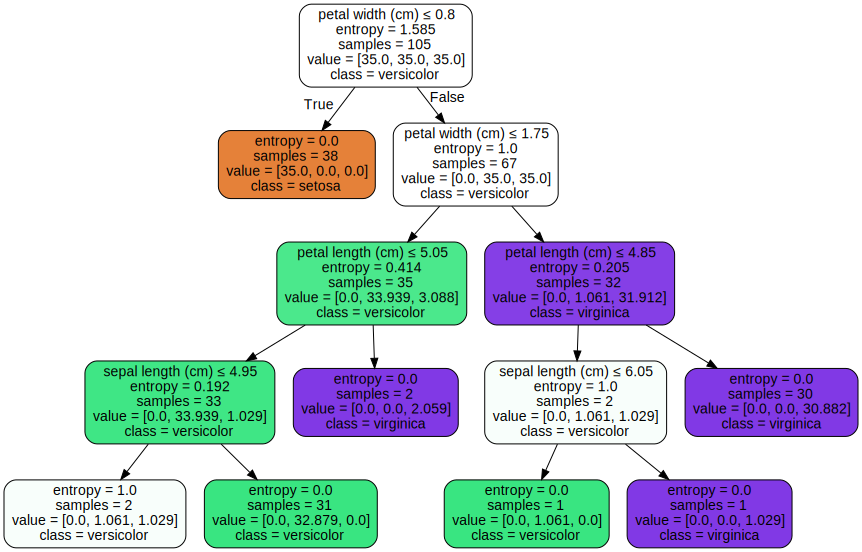

In [11]:
from sklearn.tree import export_graphviz
import graphviz

# Corramos de nuevo el clasificador de árbol de decisión
from sklearn import tree

# Se instancia el clasificador
t = tree.DecisionTreeClassifier(max_depth = 4,
                                    criterion = 'entropy', 
                                    class_weight = 'balanced',
                                    random_state = 2)
t.fit(X_train, y_train)

# Se obtiene un score
score = t.score(X_test, y_test) 
print(score)

# Generamos la visualización, exportada a un archivo .dot
export_graphviz(t, out_file="mytree.dot",  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

# Generamos la imagen a partir del archivo .dot
with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph, format = 'png')

### De Árboles de Decisión a Bosques Aleatorios (Random Forest)

Un Random Forest es simplemente una colección de árboles de decisión cuyos resultados son combinados para generar un resultado final. Su habilidad de evitar overfitting sin incrementar la cantidad de errores debido a sesgos es la razón por la cual se consideran modelos poderosos. 

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Podemos ver que para implementar un clasificador de tipo Random Forest, simplemente debe cambiarse el tipo de clasificador que se está instanciando, y algunos de sus atributos:

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=4,
                                criterion = 'entropy', 
                                n_estimators = 100, 
                                class_weight = 'balanced',
                                n_jobs = -1,
                               random_state = 2)

forest.fit(X_train, y_train)

y_preds = iris.target_names[forest.predict(X_test)]

forest.score(X_test, y_test)

0.9555555555555556

In [34]:
# Aquí una forma ágil de usar validación cruzada (útil para evaluación rápida de modelos!)
from sklearn import cross_validation

# Reinicializams el clasificador
forest = RandomForestClassifier(max_depth=4,
                                criterion = 'entropy', 
                                n_estimators = 100, 
                                class_weight = 'balanced',
                                n_jobs = -1,
                               random_state = 2)

score = cross_validation.cross_val_score(forest, X, y)
score

array([0.98039216, 0.94117647, 0.95833333])

Pregunta:  Comparando con el método de árbol de decisión, qué nos dicen estos valores de precisión?  Se ven más razonables?

Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris